In [102]:
from keras.datasets import cifar10
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
print("訓練資料量：", train_data.shape[0])
print("測試資料量：", test_data.shape[0])

訓練資料量： 50000
測試資料量： 10000


In [103]:
train_data.shape

(50000, 32, 32, 3)

In [104]:
# 圖片數字標籤轉文字
def img_trans_num_to_name(database,num):
  trans = {0:"飛機",1:"車",2:"鳥",3:"貓", 4:"鹿",5:"狗",6:"青蛙",7:"馬",8:"船",9:"卡車"}
  return trans[database[num][0]]

img_trans_num_to_name(train_label,0)

'青蛙'

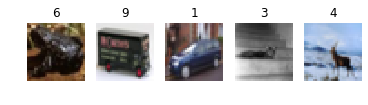

In [105]:
import matplotlib.pyplot as plt
import numpy as np
randim_num = np.random.randint(0,50000,5)
plt.figure()
for (i,idx) in enumerate(randim_num):
  plt.subplot(1,5,i+1)
  plt.title(train_label[idx][0])
  plt.axis("off")
  plt.imshow(train_data[idx])

In [0]:
# 資料處理
# 進入卷積網路範圍0-1

train_data_norm = train_data / 255
test_data_norm = test_data / 255

# 答案one hot encoding

from keras.utils.np_utils import to_categorical

train_label_cat = to_categorical(train_label)
test_label_cat = to_categorical(test_label)

In [115]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D

cnn = Sequential()

cnn.add(Conv2D(32, (3,3), activation="relu", padding="same",input_shape=(32,32,3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, (3,3), activation="relu", padding="same"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dropout(0.25))
cnn.add(Dense(256, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation="softmax"))

cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               1048832   
__________

In [0]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [119]:
cnn.fit(train_data_norm, train_label_cat, batch_size=200, epochs=6, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/6
40000/40000 [==============================] - 4s 98us/step - loss: 1.7115 - acc: 0.3689 - val_loss: 1.4213 - val_acc: 0.4898
Epoch 2/6
40000/40000 [==============================] - 3s 79us/step - loss: 1.3429 - acc: 0.5134 - val_loss: 1.1722 - val_acc: 0.5880
Epoch 3/6
40000/40000 [==============================] - 3s 77us/step - loss: 1.1779 - acc: 0.5816 - val_loss: 1.0754 - val_acc: 0.6185
Epoch 4/6
40000/40000 [==============================] - 3s 76us/step - loss: 1.0801 - acc: 0.6181 - val_loss: 0.9801 - val_acc: 0.6546
Epoch 5/6
40000/40000 [==============================] - 3s 75us/step - loss: 0.9913 - acc: 0.6537 - val_loss: 0.9761 - val_acc: 0.6635
Epoch 6/6
40000/40000 [==============================] - 3s 74us/step - loss: 0.9215 - acc: 0.6746 - val_loss: 0.8963 - val_acc: 0.6898


In [0]:
def fit_result(data, category, picture_title="history"):
  plt.title(picture_title)
  
  plt.plot(data[category])
  plt.plot(data["val"+"_"+category])
  plt.xlabel("epoch")
  plt.ylabel("train")
  plt.legend([str(category),"val"+"_"+category])
  plt.show()

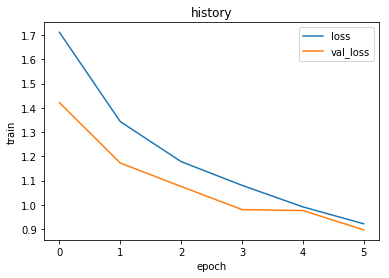

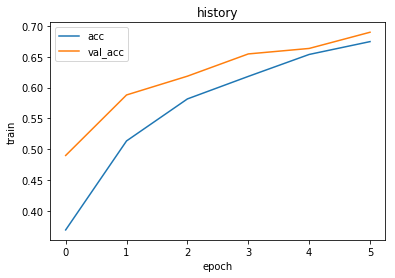

In [122]:
fit_result(cnn.history.history, "loss")
fit_result(cnn.history.history, "acc")

In [121]:
cnn.evaluate(test_data_norm,test_label_cat)

10000/10000 [==============================] - 1s 88us/step


[0.9053086308479309, 0.6861]

In [129]:
cnn.predict(test_data_norm).shape
predict_answer_list = []

for i in cnn.predict(test_data_norm):
  predict_answer_list.append(np.argmax(i))
  

np.array(predict_answer_list).shape

(10000,)

In [136]:
predict_error_img_list = np.array(predict_answer_list) != test_label.reshape(10000)
predict_error_img_list

array([False, False, False, ..., False,  True, False])

In [0]:
# 預測錯誤清單索引
predict_error_img_index = np.nonzero(predict_error_img_list)[0]

In [153]:
# 選出200個錯誤的索引
predict_error_img_index_200 = predict_error_img_index[0:200]
predict_error_img_index_200

array([  7,  12,  21,  22,  24,  25,  27,  31,  33,  35,  36,  37,  40,
        49,  52,  57,  58,  59,  61,  63,  65,  69,  76,  85,  87,  91,
       106, 109, 112, 119, 121, 122, 123, 128, 129, 132, 139, 140, 143,
       145, 147, 149, 164, 165, 167, 168, 169, 171, 181, 187, 188, 189,
       195, 197, 201, 210, 211, 213, 215, 216, 218, 219, 221, 223, 226,
       227, 228, 229, 232, 233, 237, 238, 239, 241, 242, 245, 247, 249,
       250, 251, 254, 256, 258, 262, 263, 266, 270, 273, 275, 277, 279,
       281, 284, 287, 293, 302, 306, 309, 312, 321, 322, 323, 324, 332,
       340, 343, 346, 352, 354, 355, 356, 358, 365, 367, 368, 370, 376,
       378, 383, 384, 385, 387, 388, 391, 399, 401, 405, 411, 412, 416,
       418, 421, 422, 426, 428, 430, 434, 437, 438, 445, 446, 450, 456,
       459, 460, 464, 466, 467, 474, 479, 480, 488, 492, 515, 518, 525,
       526, 528, 531, 532, 537, 538, 539, 549, 551, 552, 553, 555, 563,
       564, 565, 567, 569, 573, 577, 579, 581, 582, 583, 591, 60

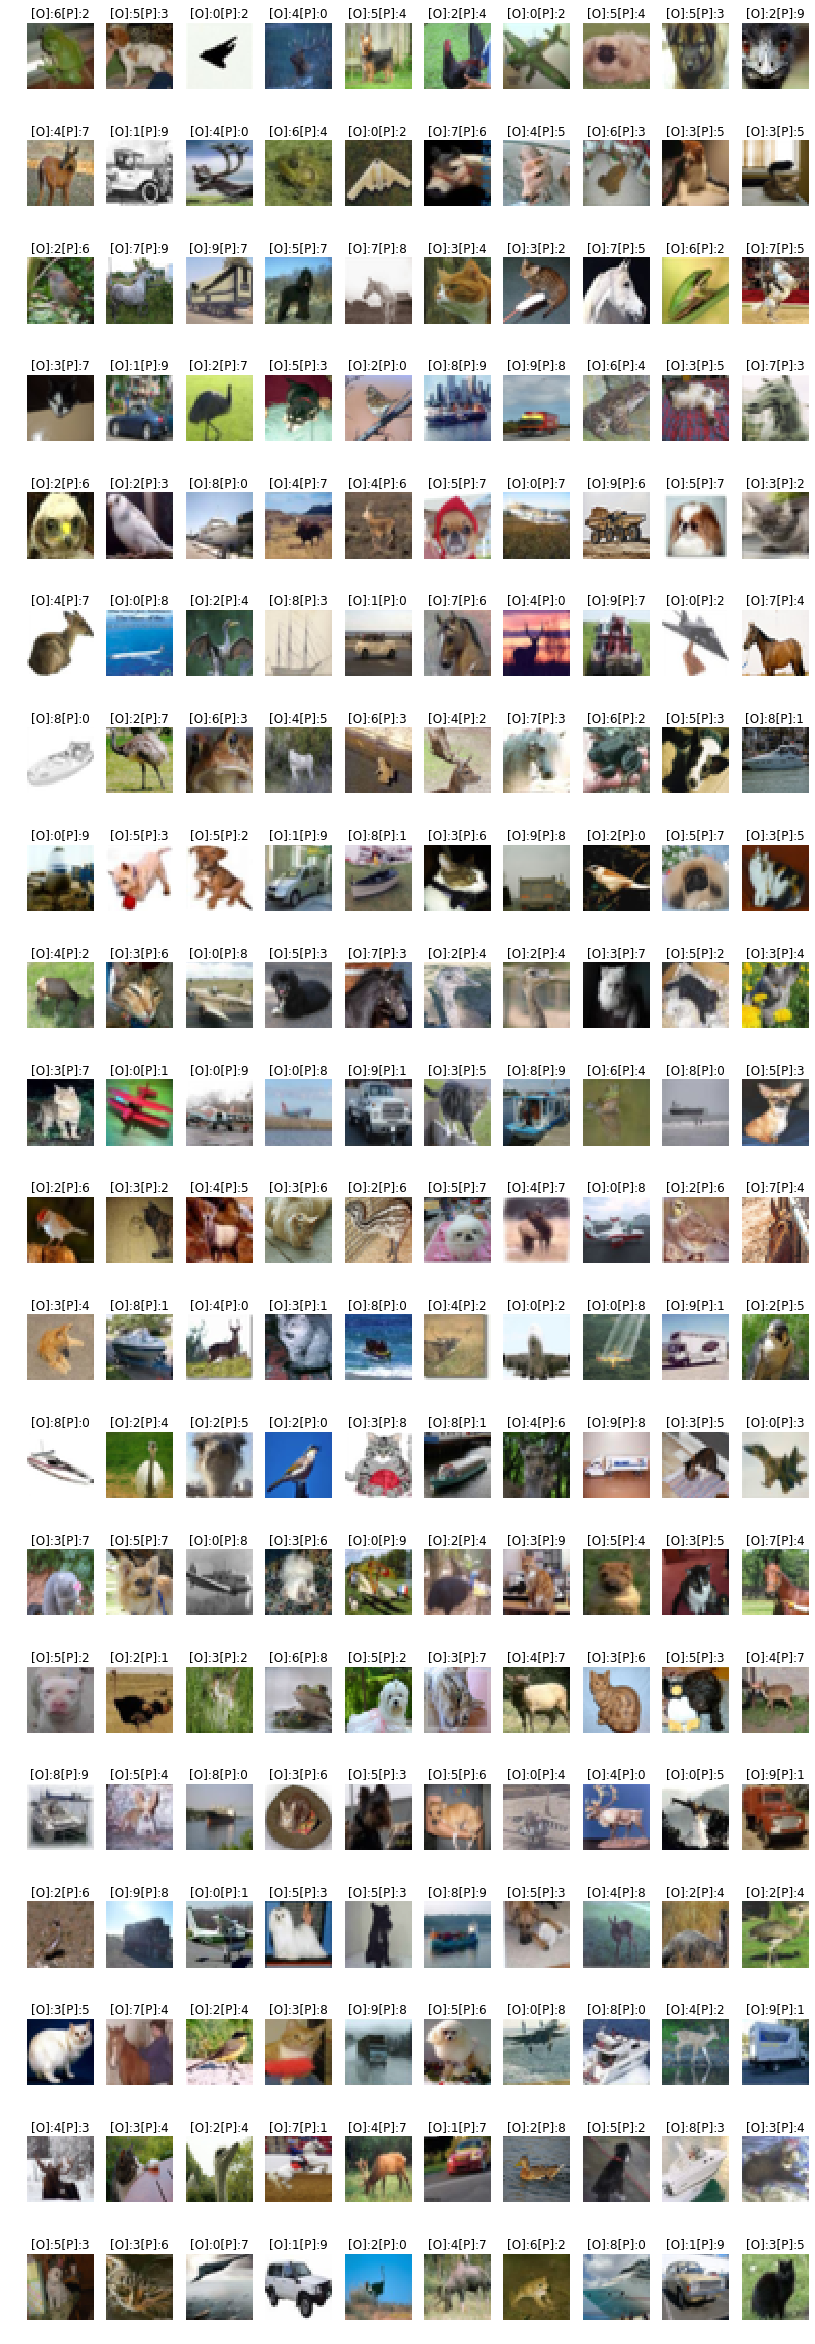

In [162]:
width = 10
height = int(predict_error_img_index_200.shape[0] / width)+1
plt.figure(figsize=(14,45))

for (idx,i) in enumerate(predict_error_img_index_200):
  plt.subplot(height, width, idx+1)
  plt.title("[O]:"+ str(test_label[i][0]) + "[P]:"+ str(np.array(predict_answer_list)[i]))
  plt.axis("off")
  plt.imshow(test_data[i])